In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
f = lambda x: np.sin(x) * x**0.5 + 1

In [18]:
h = np.pi / 7

In [19]:
xi = np.array([0, 0.5, 1.5, 2.5, 4.5, 6.5, 7]) * h

In [20]:
x = np.linspace(0, np.pi, 500)

In [49]:
x.tolist()

[0.0,
 0.006295776860901389,
 0.012591553721802777,
 0.018887330582704167,
 0.025183107443605555,
 0.031478884304506946,
 0.037774661165408334,
 0.04407043802630972,
 0.05036621488721111,
 0.0566619917481125,
 0.06295776860901389,
 0.06925354546991527,
 0.07554932233081667,
 0.08184509919171805,
 0.08814087605261944,
 0.09443665291352082,
 0.10073242977442222,
 0.10702820663532361,
 0.113323983496225,
 0.11961976035712639,
 0.12591553721802778,
 0.13221131407892917,
 0.13850709093983055,
 0.14480286780073193,
 0.15109864466163334,
 0.15739442152253472,
 0.1636901983834361,
 0.1699859752443375,
 0.1762817521052389,
 0.18257752896614027,
 0.18887330582704165,
 0.19516908268794306,
 0.20146485954884444,
 0.20776063640974582,
 0.21405641327064723,
 0.2203521901315486,
 0.22664796699245,
 0.23294374385335137,
 0.23923952071425278,
 0.24553529757515416,
 0.25183107443605557,
 0.25812685129695695,
 0.26442262815785833,
 0.2707184050187597,
 0.2770141818796611,
 0.2833099587405625,
 0.28960573

In [54]:
x.tolist().append(list(xi))
x = np.sort(x)

In [59]:
def m(i, xi, f):
    if i == 0:
        return (4 * f(xi[1]) - f(xi[2]) - 3 * f(xi[0])) / ( (xi[2]-xi[0])) 
    elif i == len(xi) - 1:
        return (3 * f(xi[i])- f(xi[i-2]) - 3 * f(xi[i-1])) / ( (xi[i]-xi[i-2]))
    else:
        return (f(xi[i+1]) + f(xi[i-1])) / ((xi[i+1]-xi[i-1]))

In [22]:
s1 = lambda i, x, xi, f: (((xi[i + 1] - x)**2 * (2*(x - xi[i]) + (xi[i + 1] - xi[i]))) / (xi[i + 1] - xi[i])**3) *  f(xi[i]) 

In [23]:
s2 = lambda i, x, xi, f: (((x - xi[i])**2 * (2*(xi[i+1]-x) + (xi[i + 1] - xi[i]))) / (xi[i + 1] - xi[i])**3) *  f(xi[i+1]) 

In [24]:
s3 = lambda i, x, xi, m: (((xi[i + 1] - x)**2 * (x - xi[i])) / (xi[i + 1] - xi[i])**2) *  m(i, xi, f) 

In [25]:
s4 = lambda i, x, xi, m: (((x - xi[i])**2 * ((x - xi[i+1]))) / ((xi[i + 1] - xi[i])**2)) *  m(i+1, xi, f) 

In [26]:
S = lambda x, i, xi, m, f, s1, s2, s3, s4: (s1(i, x, xi, f) + s2(i, x, xi, f) + s3(i, x, xi, m) + s4(i, x, xi, m))

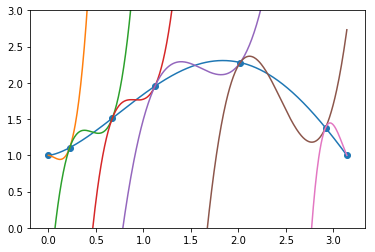

In [60]:
plt.plot(x, f(x))
plt.scatter(xi, f(xi))
plt.ylim(0, 3)
for i in range(len(xi) - 1):
    plt.plot(x, S(x, i, xi, m, f, s1, s2, s3, s4))
